<a href="https://colab.research.google.com/github/dlwogns/kaggle/blob/main/house/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('drive/MyDrive/data/house_dacon/train.csv')
test = pd.read_csv('drive/MyDrive/data/house_dacon/test.csv')
submission = pd.read_csv('drive/MyDrive/data/house_dacon/sample_submission.csv')

In [3]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [4]:
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [5]:
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


집값에 대한 회귀모델<br>
id : 데이터 고유 <br>
OverallQual : 전반적 재료와 마감 품질<br>
YearBuilt : 완공 연도<br>
YearRemodAdd : 리모델링 연도<br>
ExterQual : 외관 재료 품질<br>
BsmtQual : 지하실 높이<br>
TotalBsmtSF : 지하실 면적 <br>
1stFlrSF : 1층 면적 <br>
GrLivArea : 지상층 생활 면적<br>
FullBath : 지상층 화장실 개수 <br>
KitchenQual : 부억 품질 <br>
GarageYrBlt : 차고 완공 연도<br>
GarageCars: 차고 자리 개수<br>
GarageArea: 차고 면적 <br>
target : 집값(달러 단위)<br>


In [6]:
train.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,389.855743,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,1.000000,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,338.250000,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,675.500000,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,1012.750000,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,1350.000000,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [8]:
categorial_column = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']
for col in categorial_column:
  print(train[col].value_counts())

TA    808
Gd    485
Ex     49
Fa      8
Name: Exter Qual, dtype: int64
TA    660
Gd    560
Ex    107
Fa     23
Name: Kitchen Qual, dtype: int64
TA    605
Gd    582
Ex    134
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64


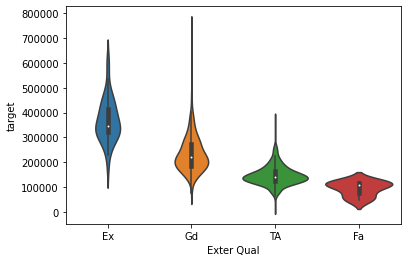

In [9]:
sns.violinplot(data=train, x='Exter Qual', y='target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


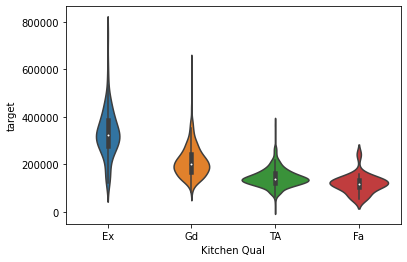

In [10]:
sns.violinplot(train['Kitchen Qual'], train['target'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


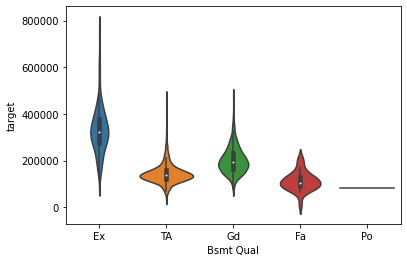

In [11]:
sns.violinplot(train['Bsmt Qual'], train['target'])

전체 퀄리티가 올라갈수록 가격도 상승. 다 더해서 Overall에 더해주면 될듯.

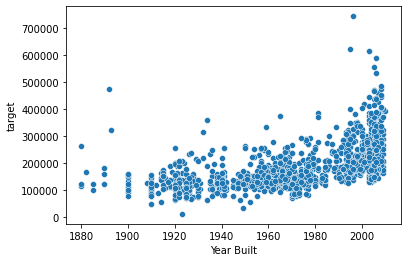

In [12]:
sns.scatterplot(x='Year Built', y='target', data = train)

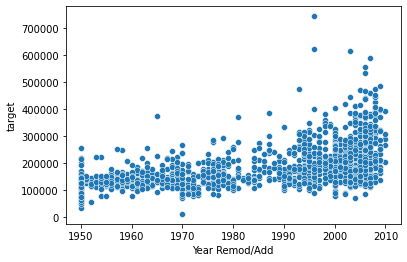

In [13]:
sns.scatterplot(x='Year Remod/Add', y='target', data = train)

In [14]:
ct = train.copy()
ct['year'] = (ct['Year Built'] + ct['Year Remod/Add'])/2 

연도는 두개 붙여서 하는게 나을거같다.

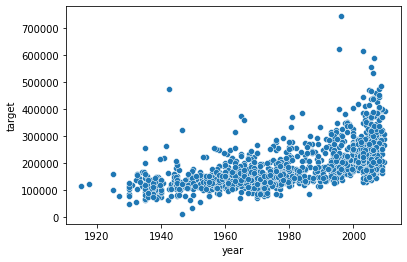

In [15]:
sns.scatterplot(x='year', y='target', data = ct)

TotalBsmtSF : 지하실 면적
1stFlrSF : 1층 면적
GrLivArea : 지상층 생활 면적
GarageArea: 차고 면적

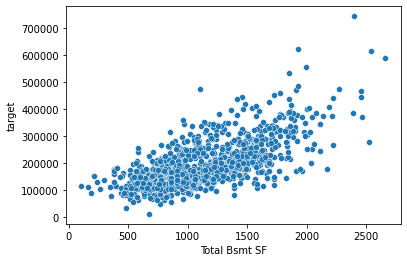

In [16]:
sns.scatterplot(x='Total Bsmt SF', y='target', data = train)

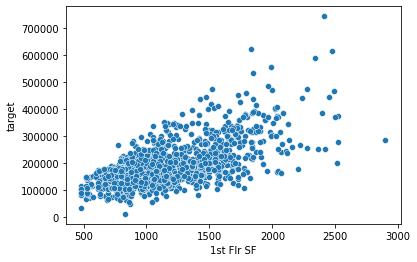

In [17]:
sns.scatterplot(x='1st Flr SF', y='target', data = train)

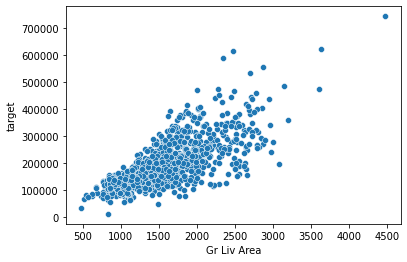

In [18]:
sns.scatterplot(x='Gr Liv Area', y='target', data = train)

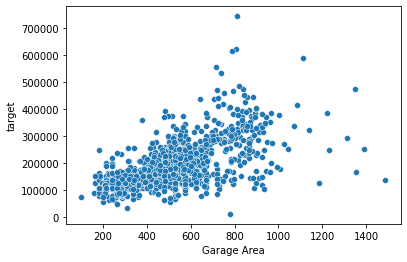

In [19]:
sns.scatterplot(x='Garage Area', y='target', data = train)

1st랑 gr은 확실하게 보이는데 다른건 확실하지가 않다.
scale해서 하나로 합쳐주면 될듯.

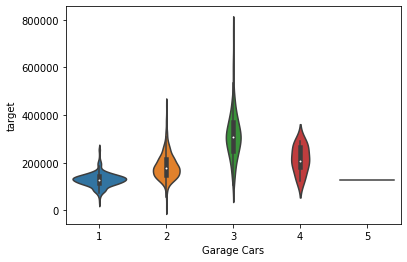

In [20]:
sns.violinplot(data=train, x='Garage Cars', y='target')

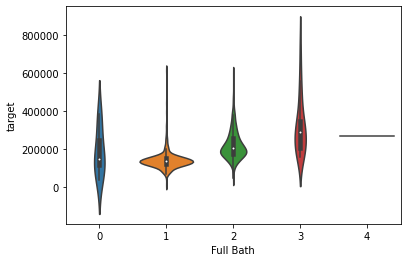

In [21]:
sns.violinplot(data=train, x='Full Bath', y='target')

둘다 버리는게 나을거같다.

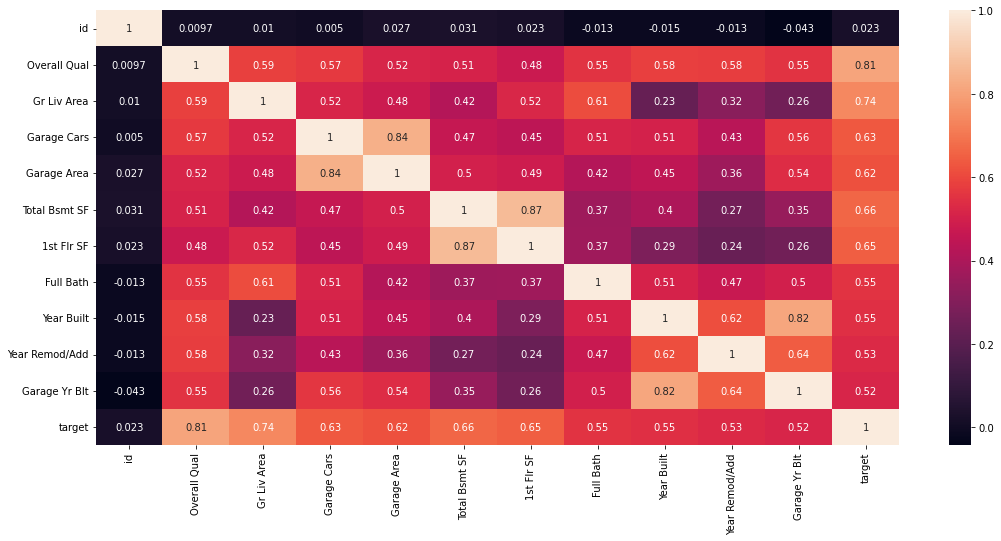

In [22]:
plt.subplots(figsize=(18,8))
sns.heatmap(train.corr(),annot=True,)

In [23]:
data = pd.concat([train, test], sort=False)

In [24]:
for col in categorial_column:
  data[data[col] == 'Po'] = 'Fa'

In [25]:
for col in categorial_column:
  data[col].replace(['Ex', 'TA','Gd','Fa'], [3,2,1,0], inplace=True)

In [26]:
data[data['Overall Qual'] == 'Fa'] = 1

In [28]:

for col in categorial_column:
  data[col] = data[col].astype(int)
  data['Overall Qual'] = data['Overall Qual'] + data[col]
  data.drop(col,axis=1,inplace=True)

In [29]:
data.head()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,19,2392,3,968,2392,2392,2,2003,2003,2003,386250.0
1,2,12,1352,2,466,1352,1352,2,2006,2007,2006,194000.0
2,3,11,900,1,288,864,900,1,1967,1967,1967,123000.0
3,4,10,1174,2,576,680,680,1,1900,2006,2000,135000.0
4,5,10,1958,3,936,1026,1026,2,2005,2005,2005,250000.0


In [30]:
drop_columns = ['id','Garage Cars','Full Bath']
for col in drop_columns:
  data.drop(col,axis=1,inplace=True)

In [31]:
data.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Garage Yr Blt,target
0,19,2392,968,2392,2392,2003,2003,2003,386250.0
1,12,1352,466,1352,1352,2006,2007,2006,194000.0
2,11,900,288,864,900,1967,1967,1967,123000.0
3,10,1174,576,680,680,1900,2006,2000,135000.0
4,10,1958,936,1026,1026,2005,2005,2005,250000.0


In [32]:
data.drop('Garage Area',axis=1, inplace=True)

In [33]:
c_data = data.copy()
y = c_data['target']
c_data.drop('target',axis=1,inplace=True)

In [34]:
c_data.head()

,Overall Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Garage Yr Blt
0,19,2392,2392,2392,2003,2003,2003
1,12,1352,1352,1352,2006,2007,2006
2,11,900,864,900,1967,1967,1967
3,10,1174,680,680,1900,2006,2000
4,10,1958,1026,1026,2005,2005,2005


In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [66]:
scaler = StandardScaler()
c_data_scaled = scaler.fit_transform(c_data)
c_data_scaled_df = pd.DataFrame(c_data_scaled,columns=c_data.columns)

In [67]:
c_data_scaled_df.head()

,Overall Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Garage Yr Blt
0,4.142586,1.737216,3.176508,3.108781,0.442374,0.289108,0.377384
1,0.467288,-0.328680,0.636311,0.461335,0.484035,0.346915,0.419860
2,-0.057755,-1.226550,-0.555627,-0.689285,-0.057553,-0.231152,-0.132332
3,-0.582797,-0.682266,-1.005047,-1.249322,-0.987974,0.332463,0.334907
4,-0.582797,0.875102,-0.159943,-0.368537,0.470148,0.318011,0.405701


In [41]:
c_data_scaled_df['year'] = (c_data_scaled_df['Year Built'] + c_data_scaled_df['Year Remod/Add'] + c_data_scaled_df['Garage Yr Blt'])/3

In [42]:
c_data_scaled_df['area'] = (c_data_scaled_df['Gr Liv Area'] + c_data_scaled_df['Total Bsmt SF'] + c_data_scaled_df['1st Flr SF'])/3

In [43]:
drop_columns=['Year Built','Year Remod/Add','Garage Yr Blt','Gr Liv Area','Total Bsmt SF','1st Flr SF']
for col in drop_columns:
  c_data_scaled_df.drop(col,axis=1,inplace=True)

In [68]:
X_train = c_data_scaled_df[:len(train)]
X_test = c_data_scaled_df[len(train):]
y_train = y[:len(train)]

In [69]:
#y_train.corr(X_train['area'])
y_train = y_train.astype(float)

In [70]:
X_train

,Overall Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Garage Yr Blt
0,4.142586,1.737216,3.176508,3.108781,0.442374,0.289108,0.377384
1,0.467288,-0.328680,0.636311,0.461335,0.484035,0.346915,0.419860
2,-0.057755,-1.226550,-0.555627,-0.689285,-0.057553,-0.231152,-0.132332
3,-0.582797,-0.682266,-1.005047,-1.249322,-0.987974,0.332463,0.334907
4,-0.582797,0.875102,-0.159943,-0.368537,0.470148,0.318011,0.405701
...,...,...,...,...,...,...,...
1345,0.467288,0.473841,-0.536087,-0.719833,0.345166,0.202398,0.278272
1346,2.567458,2.444389,1.852675,1.729054,0.484035,0.332463,0.419860
1347,-0.057755,-0.602808,0.299247,0.110040,-0.057553,-0.231152,-0.132332
1348,-0.582797,-1.238469,-0.555627,-0.704559,0.039655,-0.129990,-0.033221


In [71]:
for col in X_train:
  print(y_train.corr(X_train[col]))

0.6155447456955929
0.7431194077976377
0.6651025293522045
0.6481776187403926
0.3171280780204542
0.24567123288599937
0.27802672037887427


In [78]:
cX_train = X_train.copy()
cX_test = X_test.copy()
cX_train['year'] = 

In [72]:
X_train

,Overall Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Garage Yr Blt
0,4.142586,1.737216,3.176508,3.108781,0.442374,0.289108,0.377384
1,0.467288,-0.328680,0.636311,0.461335,0.484035,0.346915,0.419860
2,-0.057755,-1.226550,-0.555627,-0.689285,-0.057553,-0.231152,-0.132332
3,-0.582797,-0.682266,-1.005047,-1.249322,-0.987974,0.332463,0.334907
4,-0.582797,0.875102,-0.159943,-0.368537,0.470148,0.318011,0.405701
...,...,...,...,...,...,...,...
1345,0.467288,0.473841,-0.536087,-0.719833,0.345166,0.202398,0.278272
1346,2.567458,2.444389,1.852675,1.729054,0.484035,0.332463,0.419860
1347,-0.057755,-0.602808,0.299247,0.110040,-0.057553,-0.231152,-0.132332
1348,-0.582797,-1.238469,-0.555627,-0.704559,0.039655,-0.129990,-0.033221


In [73]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [74]:
Kf = KFold(n_splits=5, shuffle=True, random_state=0)
li_reg = LinearRegression()
LGBM_reg = LGBMRegressor()
rf_reg = RandomForestRegressor(max_depth=5, n_estimators=50)
clf=[li_reg, LGBM_reg,rf_reg]
for c in clf:
  scores = cross_val_score(c, X_train, y_train, cv = Kf )
  print(scores)

[ 0.69752249 -2.30850583  0.7791763   0.79240619  0.79622992]
[0.80117716 0.8637596  0.80634356 0.87046247 0.8638029 ]
[0.80607403 0.84246077 0.82384055 0.8661636  0.84323167]


In [79]:
from sklearn.ensemble import VotingRegressor

In [83]:
models = [('gbm',LGBM_reg)
          ,('rf',rf_reg)]

In [84]:
vot_reg = VotingRegressor(estimators=models)

In [85]:
vot_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('gbm', LGBMRegressor()),
                            ('rf',
                             RandomForestRegressor(max_depth=5,
                                                   n_estimators=50))])

In [87]:
score = cross_val_score(vot_reg, X_train, y_train, cv= Kf)
print(score)

[0.81145305 0.86482925 0.82245108 0.87492961 0.86483597]


In [75]:
LGBM_reg.fit(X_train, y_train)

LGBMRegressor()

In [76]:
LGBM_pred = LGBM_reg.predict(X_test)

In [77]:
lgbmsub = pd.read_csv('drive/MyDrive/data/house_dacon/sample_submission.csv')
lgbmsub['target'] = list(map(int,LGBM_pred))
lgbmsub.to_csv('lgbmsub2.csv', index=False)

In [ ]:
rf_reg.fit(X_train,y_train)
rf_pred=rf_reg.predict(X_test)
rfsub = pd.read_csv('drive/MyDrive/data/house_dacon/sample_submission.csv')
rfsub['target'] = list(map(int,rf_pred))
rfsub.to_csv('rfsub.csv', index=False)

In [88]:

vot_pred=vot_reg.predict(X_test)
votsub = pd.read_csv('drive/MyDrive/data/house_dacon/sample_submission.csv')
votsub['target'] = list(map(int,vot_pred))
votsub.to_csv('votsub.csv', index=False)